In [12]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path

import glob

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

In [13]:
#data_path = Path('/Users/carolineahn/Documents/GitHub/ARC-behavioral/data/keywords/')
data_path = Path('/Users/carolineahn/Documents/GitHub/ARC-behavioral/data/')

training_tasks = [f for f in os.listdir(data_path) if f.endswith('.json')]
print(training_tasks)

['00.json']


In [14]:
def plot_one(ax, i,train_or_test,input_or_output):
    cmap = colors.ListedColormap(
        ['#2B2B2B', '#248ADA','#C71010','#1FC719','#F7DE28',
         '#878494', '#F954F2', '#EE6000', '#6B23A9', '#8B5A28'])
    norm = colors.Normalize(vmin=0, vmax=9)
    
    input_matrix = task[train_or_test][i][input_or_output]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True,which='both',color='lightgrey', linewidth=0.5)    
    ax.set_yticks([x-0.5 for x in range(1+len(input_matrix))])
    ax.set_xticks([x-0.5 for x in range(1+len(input_matrix[0]))])     
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    if train_or_test == 'train' and input_or_output == 'input':
        ax.set_title('Example #'+ str(i+1), fontsize=28, loc='center', pad=30)
    elif train_or_test == 'test' and input_or_output == 'input':
        ax.set_title('Test Input', fontsize=28, loc='center', pad=30)
    else:
        ax.set_title('↓', fontsize=60, loc='center', pad=30)
    #remove tickmarks
    ax.tick_params(
        axis='both', which='both', length=0,
        bottom=False, top=False, left=False, right=False)
    

def plot_task(task):
    """
    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app
    """    
    num_train = len(task['train'])
    fig, axs = plt.subplots(2, num_train, figsize=(5 * num_train, 10))
    for i in range(num_train):     
        plot_one(axs[0,i],i,'train','input')
        plot_one(axs[1,i],i, 'train','output')        
    plt.tight_layout()

0
00.json


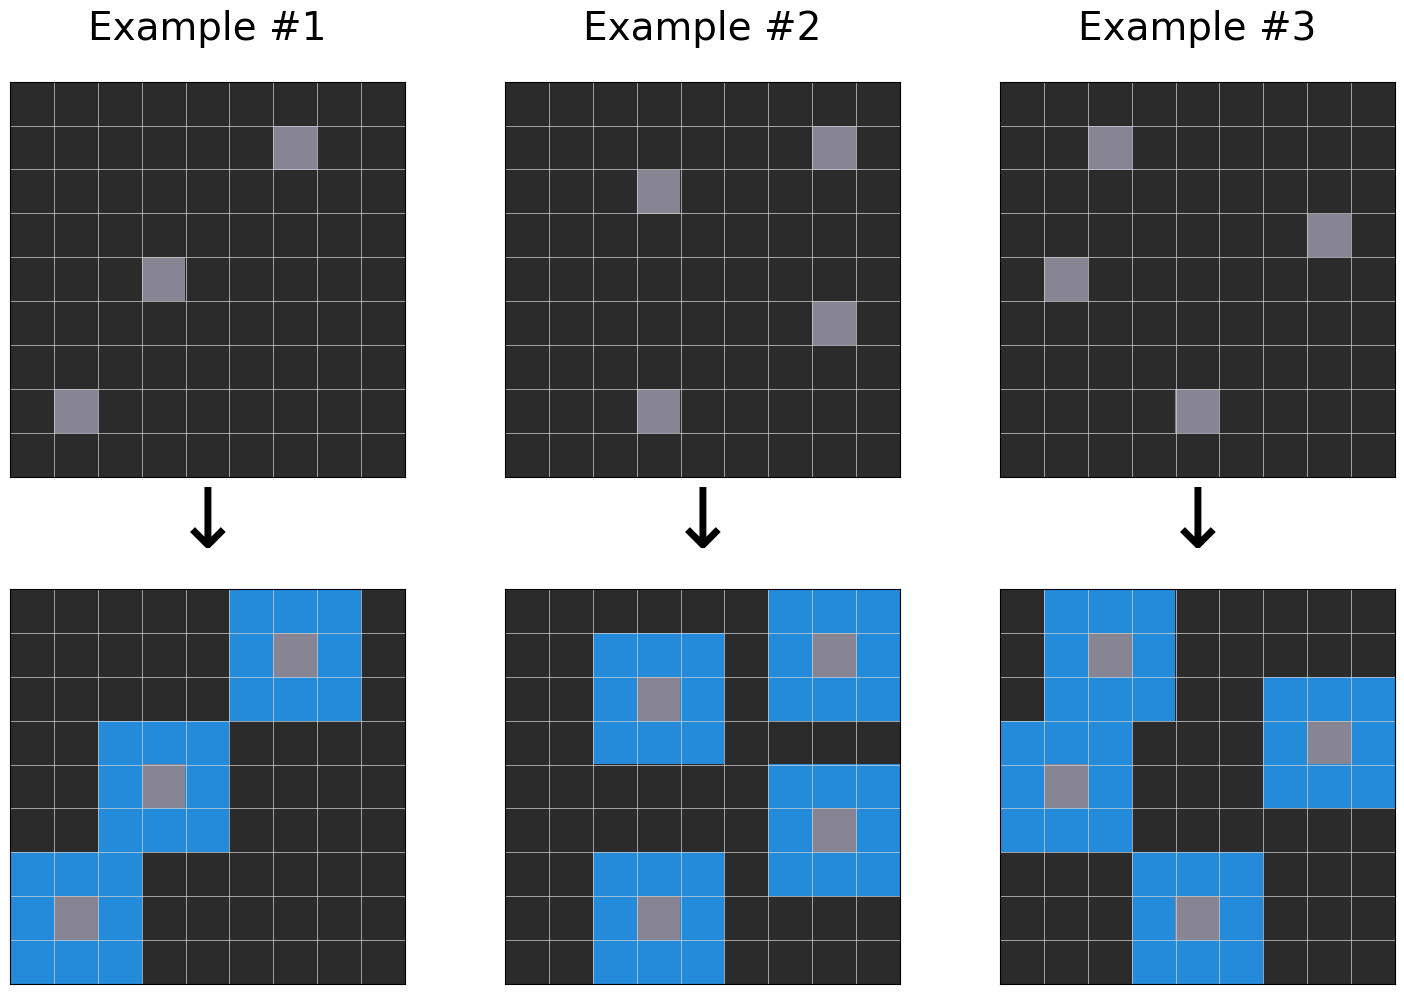

In [18]:
for i in range(len(training_tasks)):
    task_file = data_path / training_tasks[i]
    filename = os.path.basename(task_file)
    
    with open(data_path/task_file, 'r') as f:
        task = json.load(f)
        
    print(i)
    print(training_tasks[i])
    plot_task(task)
    plt.savefig(f'/Users/carolineahn/Documents/GitHub/ARC-behavioral/data/keyword-examples/{filename}.png', dpi=300, transparent=True, bbox_inches='tight')
    plt.show()
    plt.close()

In [16]:
def plot_task_withTest(task):
    """
    Plots the train pairs and test pairs of a specified task,
    using the same color scheme as the ARC app
    """    
    num_train = min(3, len(task['train']))
    #num_train = len(task['train'])
    num_test = len(task['test'])
    
    fig, axs = plt.subplots(2, num_train + num_test, figsize=(5 * (num_train + num_test), 10))
    
    # Plot training data
    for i in range(num_train):     
        plot_one(axs[0, i], i, 'train', 'input')
        plot_one(axs[1, i], i, 'train', 'output')        
    
    # Plot test data
    for i in range(num_test):
        plot_one(axs[0, num_train + i], i, 'test', 'input')
        # Leave the output space blank
        axs[1, num_train + i].set_xticks([])
        axs[1, num_train + i].set_yticks([])
        axs[1, num_train + i].set_xticklabels([])
        axs[1, num_train + i].set_yticklabels([])
        axs[1, num_train + i].tick_params(
            axis='both', which='both', length=0,
            bottom=False, top=False, left=False, right=False)
        axs[1, num_train + i].set_frame_on(False)  # Remove bounding box
        axs[1, num_train + i].set_title('↓', fontsize=60, loc='center', pad=30)  # Set title as downward arrow
    
    plt.tight_layout()


0
00.json


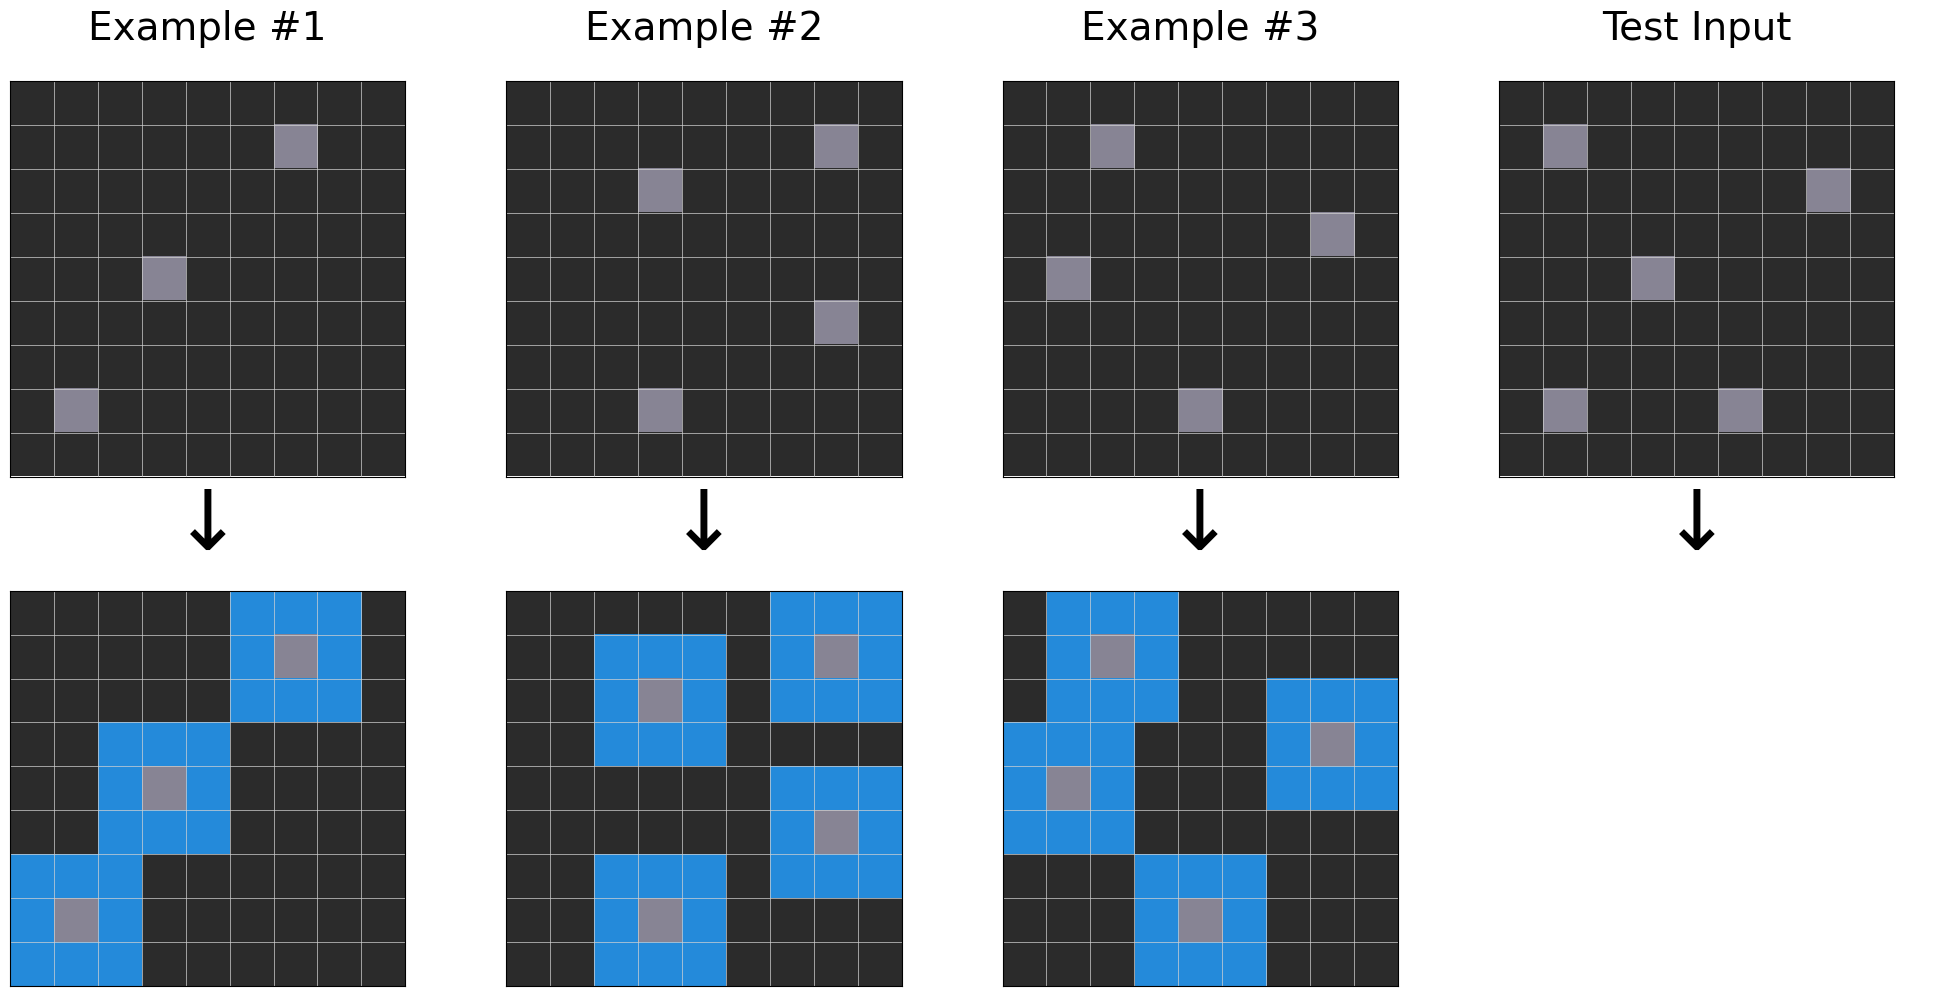

In [17]:
for i in range(len(training_tasks)):
    task_file = data_path / training_tasks[i]
    filename = os.path.basename(task_file)
    
    with open(data_path/task_file, 'r') as f:
        task = json.load(f)
        
    print(i)
    print(training_tasks[i])
    plot_task_withTest(task)
    #plt.savefig(f'/Users/carolineahn/Documents/GitHub/ARC-behavioral/data/keyword-withtest/{filename}.png', dpi=300, transparent=True, bbox_inches='tight')
    plt.savefig(f'/Users/carolineahn/Documents/GitHub/ARC-behavioral/data/{filename}.png', dpi=300, transparent=True, bbox_inches='tight')
    plt.show()
    plt.close()